In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob
from os.path import expanduser

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np
import tifffile

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Measurement

In [3]:
stitched = tifffile.imread('/Users/zfphil/datasets/motiondeblur/stitched_recon_coded163c.tiff')

In [6]:
flat_field_y, flat_field_x = md.estimateBackgroundPolynomial(stitched,downsample=512)

In [8]:
flattened = stitched / flat_field_y / flat_field_x

In [9]:
stitched.dtype

dtype('uint8')

In [11]:
flattened -= yp.min(flattened)
flattened /= yp.max(flattened)
flattened *= 255

flattened = flattened.astype(np.uint8)
tifffile.imsave('stitched_recon_coded163c_flattened.tiff', flattened)

In [12]:
!open .

<IPython.core.display.Javascript object>


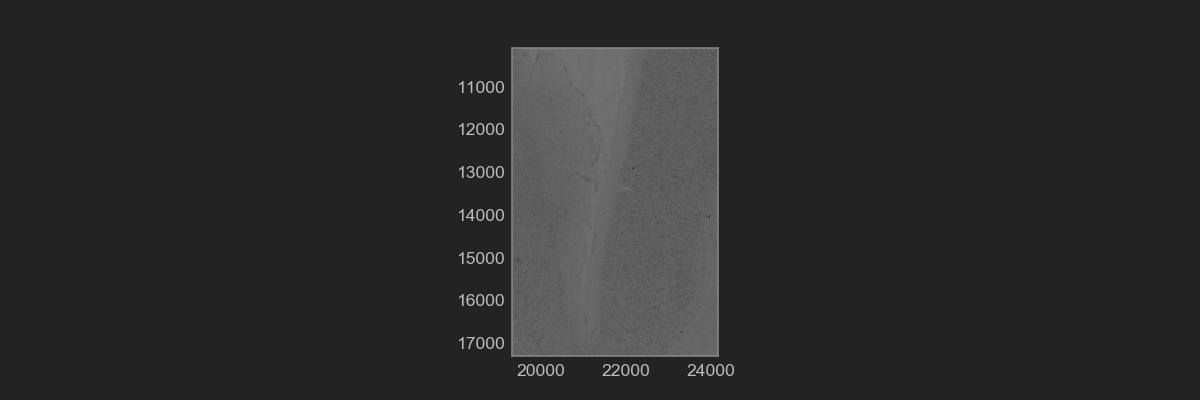

In [7]:
plt.figure()
plt.imshow()